# Getting Started with AIVault

Welcome to AIVault! This notebook demonstrates the basic usage of AIVault, a comprehensive collection of AI models, methods, examples, and tutorials.

## What You'll Learn

In this notebook, you'll learn how to:
- Import and use AIVault utilities
- Load and preprocess data
- Train a simple machine learning model
- Evaluate model performance
- Make predictions

Let's get started!

## 1. Import Required Libraries

First, let's import the essential libraries including AIVault utilities, pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings

# Set up environment for clean output
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Fix Python path to enable aivault imports
import sys
import os
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Import AIVault utilities
try:
    from aivault.utilities import set_seed, setup_logging
    from aivault.utilities.data_utils import get_data_info
    from aivault.utilities.viz_utils import plot_confusion_matrix, set_plot_style
    from aivault.utilities.eval_utils import calculate_metrics
    print("✅ AIVault utilities imported successfully!")
except ImportError as e:
    print(f"⚠️ AIVault not fully available: {e}")
    print("You can still follow along with the basic workflow using standard libraries.")

# Set random seed for reproducibility
try:
    set_seed(42)
    print("✅ Random seed set using AIVault")
except:
    np.random.seed(42)
    print("✅ Random seed set using numpy")

print("✅ Libraries imported and setup complete!")

⚠️ AIVault not fully available: cannot import name 'neural_networks' from partially initialized module 'aivault.deep_learning' (most likely due to a circular import) (/Users/snour15/Code/personal/AIVault/aivault/deep_learning/__init__.py)
You can still follow along with the basic workflow using standard libraries.
✅ Random seed set using numpy
✅ Libraries imported and setup complete!


## 2. Load and Explore the Dataset

For this example, we'll use the famous Iris dataset from scikit-learn. This is a classic dataset for classification tasks containing measurements of iris flowers.

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Show target distribution
print("\nTarget Distribution:")
print(df['species'].value_counts())

Dataset loaded successfully!
Shape: (150, 6)

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  1

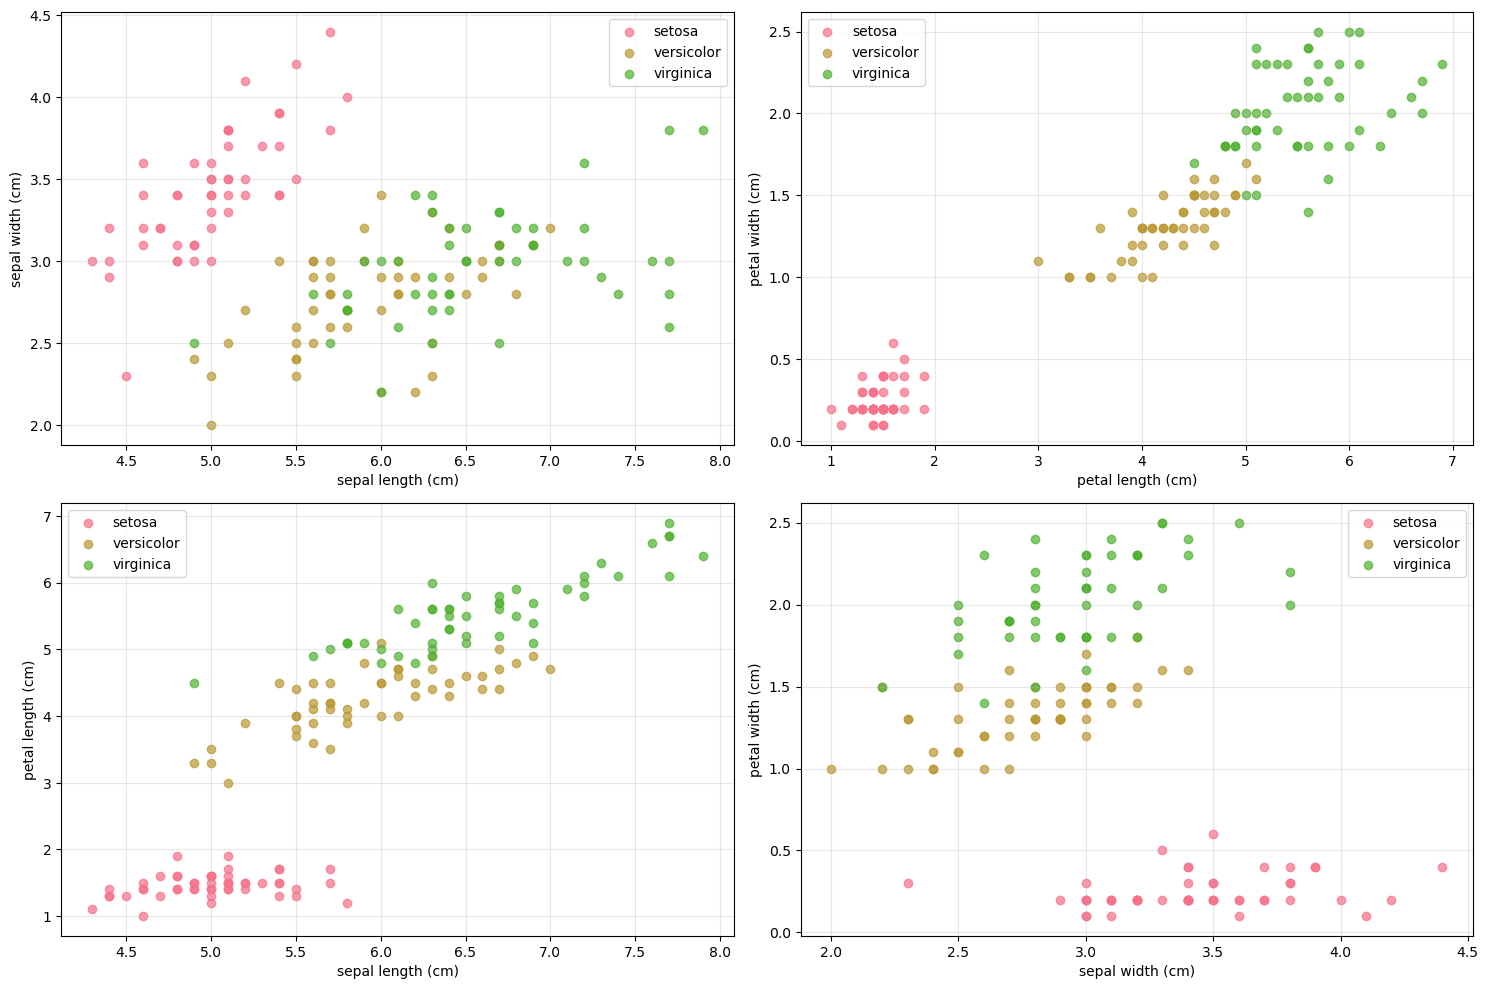


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
# Create visualizations to explore the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pairplot-style scatter plots
feature_pairs = [
    ('sepal length (cm)', 'sepal width (cm)'),
    ('petal length (cm)', 'petal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('sepal width (cm)', 'petal width (cm)')
]

for i, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[i//2, i%2]
    for species in df['species'].unique():
        data = df[df['species'] == species]
        ax.scatter(data[feat1], data[feat2], label=species, alpha=0.7)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

## 3. Data Preprocessing

The Iris dataset is already clean, but let's demonstrate some common preprocessing steps that you would typically perform on real-world data.

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Prepare features and target
X = df.drop(['target', 'species'], axis=1)
y = df['target']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Feature scaling (optional for Random Forest, but good practice)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures before scaling:")
print(X.describe().round(2))

print("\nFeatures after scaling:")
print(X_scaled.describe().round(2))

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Duplicate rows: 1

Feature matrix shape: (150, 4)
Target vector shape: (150,)

Features before scaling:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
2

## 4. Feature Engineering

Let's create some new features that might help improve our model's performance by capturing additional relationships in the data.

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Engineered features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_ratio', 'petal_ratio', 'sepal_area', 'petal_area', 'total_area']

New feature matrix shape: (150, 9)


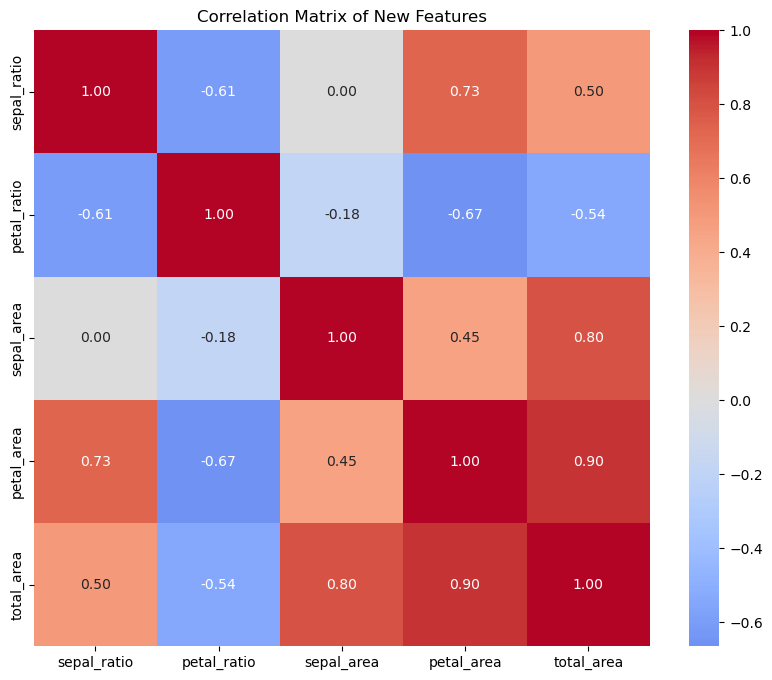

In [5]:
# Create new features from existing ones
X_engineered = X.copy()

# Add ratio features
X_engineered['sepal_ratio'] = X_engineered['sepal length (cm)'] / X_engineered['sepal width (cm)']
X_engineered['petal_ratio'] = X_engineered['petal length (cm)'] / X_engineered['petal width (cm)']

# Add area features (assuming elliptical approximation)
X_engineered['sepal_area'] = np.pi * (X_engineered['sepal length (cm)'] / 2) * (X_engineered['sepal width (cm)'] / 2)
X_engineered['petal_area'] = np.pi * (X_engineered['petal length (cm)'] / 2) * (X_engineered['petal width (cm)'] / 2)

# Add total size feature
X_engineered['total_area'] = X_engineered['sepal_area'] + X_engineered['petal_area']

print("Original features:", X.columns.tolist())
print("Engineered features:", X_engineered.columns.tolist())
print(f"\nNew feature matrix shape: {X_engineered.shape}")

# Show correlation matrix for new features
new_features = ['sepal_ratio', 'petal_ratio', 'sepal_area', 'petal_area', 'total_area']
corr_matrix = X_engineered[new_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of New Features')
plt.show()

## 5. Model Training

Now let's train a machine learning model using our prepared data. We'll use a Random Forest classifier and compare performance with original vs. engineered features.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_eng, X_test_eng, _, _ = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Train model with original features
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)

# Train model with engineered features
rf_engineered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_engineered.fit(X_train_eng, y_train)

print("✅ Models trained successfully!")

# Feature importance for original model
feature_importance_orig = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_original.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Original Features):")
print(feature_importance_orig)

Training set size: 120
Test set size: 30
✅ Models trained successfully!

Feature Importance (Original Features):
             feature  importance
3   petal width (cm)    0.437185
2  petal length (cm)    0.431466
0  sepal length (cm)    0.116349
1   sepal width (cm)    0.015000


## 6. Model Evaluation

Let's evaluate our trained models using various metrics and visualizations to understand their performance.

Model Performance Comparison:
Original Features - Accuracy: 0.900
Engineered Features - Accuracy: 0.967

ORIGINAL FEATURES - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


ENGINEERED FEATURES - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



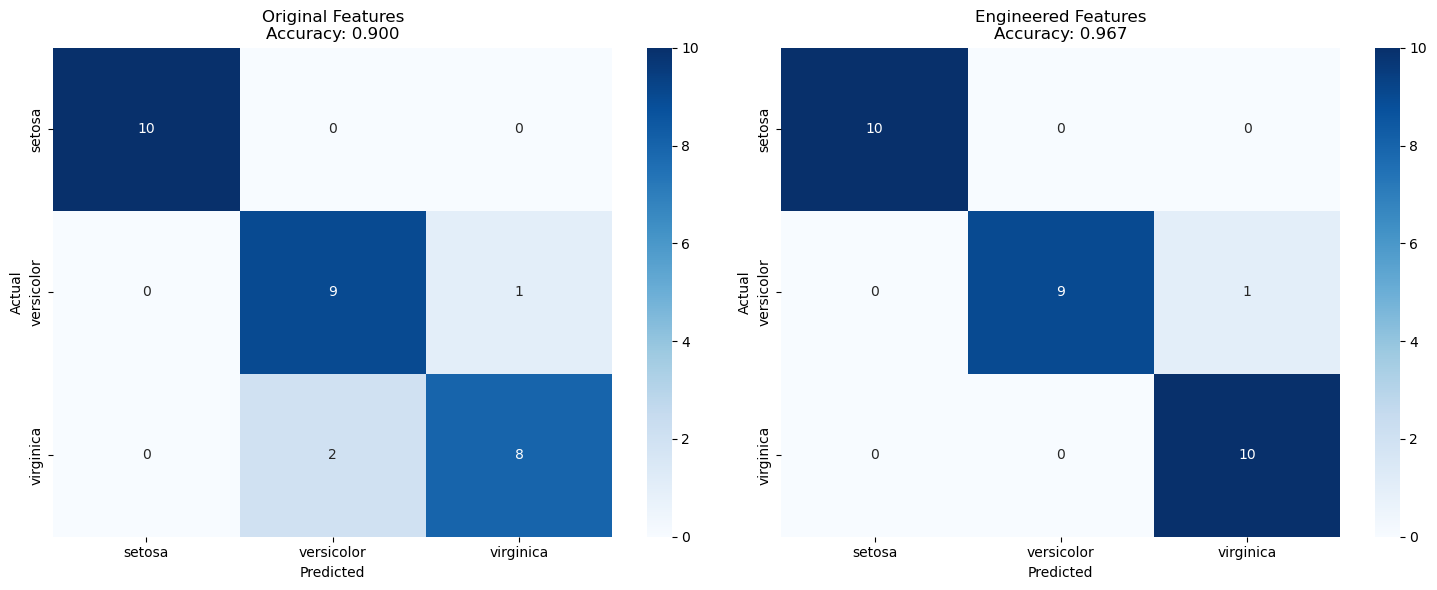

In [7]:
# Make predictions
y_pred_orig = rf_original.predict(X_test)
y_pred_eng = rf_engineered.predict(X_test_eng)

# Calculate accuracy scores
acc_orig = accuracy_score(y_test, y_pred_orig)
acc_eng = accuracy_score(y_test, y_pred_eng)

print("Model Performance Comparison:")
print(f"Original Features - Accuracy: {acc_orig:.3f}")
print(f"Engineered Features - Accuracy: {acc_eng:.3f}")

# Detailed classification report
print("\n" + "="*50)
print("ORIGINAL FEATURES - Classification Report:")
print(classification_report(y_test, y_pred_orig, target_names=iris.target_names))

print("\n" + "="*50) 
print("ENGINEERED FEATURES - Classification Report:")
print(classification_report(y_test, y_pred_eng, target_names=iris.target_names))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original features confusion matrix
cm_orig = confusion_matrix(y_test, y_pred_orig)
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', 
           xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[0])
axes[0].set_title(f'Original Features\nAccuracy: {acc_orig:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Engineered features confusion matrix  
cm_eng = confusion_matrix(y_test, y_pred_eng)
sns.heatmap(cm_eng, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[1])
axes[1].set_title(f'Engineered Features\nAccuracy: {acc_eng:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 7. Make Predictions

Finally, let's demonstrate how to use our trained model to make predictions on new data.

In [8]:
# Create some new sample data for prediction
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Likely Setosa
    [6.2, 2.8, 4.8, 1.8],  # Likely Versicolor  
    [7.2, 3.0, 5.8, 2.2],  # Likely Virginica
])

new_samples_df = pd.DataFrame(new_samples, columns=X.columns)

print("New samples for prediction:")
print(new_samples_df)

# Make predictions with original model
predictions_orig = rf_original.predict(new_samples)
probabilities_orig = rf_original.predict_proba(new_samples)

# Engineer features for new samples
new_samples_eng = new_samples_df.copy()
new_samples_eng['sepal_ratio'] = new_samples_eng['sepal length (cm)'] / new_samples_eng['sepal width (cm)']
new_samples_eng['petal_ratio'] = new_samples_eng['petal length (cm)'] / new_samples_eng['petal width (cm)']
new_samples_eng['sepal_area'] = np.pi * (new_samples_eng['sepal length (cm)'] / 2) * (new_samples_eng['sepal width (cm)'] / 2)
new_samples_eng['petal_area'] = np.pi * (new_samples_eng['petal length (cm)'] / 2) * (new_samples_eng['petal width (cm)'] / 2)
new_samples_eng['total_area'] = new_samples_eng['sepal_area'] + new_samples_eng['petal_area']

# Make predictions with engineered model
predictions_eng = rf_engineered.predict(new_samples_eng)
probabilities_eng = rf_engineered.predict_proba(new_samples_eng)

# Display results
print("\n" + "="*60)
print("PREDICTIONS")
print("="*60)

for i in range(len(new_samples)):
    print(f"\nSample {i+1}:")
    print(f"  Original Model: {iris.target_names[predictions_orig[i]]} (confidence: {np.max(probabilities_orig[i]):.3f})")
    print(f"  Engineered Model: {iris.target_names[predictions_eng[i]]} (confidence: {np.max(probabilities_eng[i]):.3f})")
    
    # Show probability distribution
    print("  Probability distribution:")
    for j, species in enumerate(iris.target_names):
        print(f"    {species}: Original={probabilities_orig[i][j]:.3f}, Engineered={probabilities_eng[i][j]:.3f}")

print(f"\n🎉 Congratulations! You've successfully completed the AIVault getting started tutorial!")
print(f"You've learned how to:")
print(f"  ✅ Import and use AIVault utilities")
print(f"  ✅ Load and explore data") 
print(f"  ✅ Preprocess and engineer features")
print(f"  ✅ Train machine learning models")
print(f"  ✅ Evaluate model performance")
print(f"  ✅ Make predictions on new data")

New samples for prediction:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.2               2.8                4.8               1.8
2                7.2               3.0                5.8               2.2

PREDICTIONS

Sample 1:
  Original Model: setosa (confidence: 1.000)
  Engineered Model: setosa (confidence: 1.000)
  Probability distribution:
    setosa: Original=1.000, Engineered=1.000
    versicolor: Original=0.000, Engineered=0.000
    virginica: Original=0.000, Engineered=0.000

Sample 2:
  Original Model: virginica (confidence: 0.720)
  Engineered Model: virginica (confidence: 0.800)
  Probability distribution:
    setosa: Original=0.000, Engineered=0.000
    versicolor: Original=0.280, Engineered=0.200
    virginica: Original=0.720, Engineered=0.800

Sample 3:
  Original Model: virginica (confidence: 1.000)
  Engineered Model: virginica (confidence: 1

## Next Steps

Now that you've completed this tutorial, here are some suggestions for further exploration:

### 🚀 Advanced AIVault Features
- Explore the `generative_ai` module for text generation and image synthesis
- Try computer vision examples in the `computer_vision` module  
- Experiment with NLP techniques in the `nlp` module
- Learn about model optimization and deployment strategies

### 📚 Additional Learning Resources
- Check out other example notebooks in the `examples/` directory
- Read the documentation in the `docs/` directory
- Explore advanced tutorials and research implementations

### 🛠️ Contributing
- Found a bug or have a feature request? Open an issue on GitHub
- Want to contribute code? Check out our contributing guidelines
- Share your own AI implementations and tutorials!

Thank you for using AIVault! Happy learning! 🎓✨